In [3]:
import nibabel as nib
import numpy as np
from nilearn import image
from nilearn.reporting import get_clusters_table
import pandas as pd
import seaborn as sns

In [12]:
base_dir = '~/projects/PIC_conditioning_withinsub_nodatalad'# adjust to you base dir
data_4d_ranked = base_dir + '/all_data_tranked.nii'
palm_dir = base_dir + '/palm_simple_studymod_nopain_tranked+covs/palm_simple_studymod_tranked_nopain+covs'

In [13]:
data_4d_ranked_img = nib.load(data_4d_ranked)

In [14]:
pheno = pd.read_csv(base_dir + '/signatures.csv')
pheno

,Unnamed: 0,Study_ID,Sub_ID,Male,Age,NPS_pain_ctr,Rating_pain_ctr,Rating_diff,Conditioning,TR,...,pain_nociception_mediation_geuter_2020,fear_vicarious_pain_zhou_2020,negative_affect_common_ceko_2022,negative_affect_mechanical_ceko_2022,negative_affect_sound_ceko_2022,negative_affect_thermal_ceko_2022,negative_affect_visual_ceko_2022,vifs_fear_picture_zhou_2021,basic_sexual_image_vanthof_2021,brs_reward_monetary_speer_2022
0,0,atlas,atlas_remi1022s1,0.47619,24.7,-14.056126,49.023445,-2.664155,suggestions,2000,...,0.161551,0.016313,0.037931,0.001628,0.037247,0.001329,0.040771,0.047013,-0.040887,0.041096
1,1,atlas,atlas_remi1056s1,0.47619,24.7,-17.798976,76.747404,-20.196549,suggestions,2000,...,0.087394,0.023691,-0.037930,-0.007684,-0.009602,-0.017617,-0.025331,0.037159,0.002307,-0.041179
2,2,atlas,atlas_remi1090s2,0.47619,24.7,2.168433,92.352895,-14.623164,suggestions,2000,...,-0.023788,0.072299,0.017802,-0.013074,-0.031132,0.043191,-0.007662,0.026102,0.008086,-0.067313
3,3,atlas,atlas_remi1126,0.47619,24.7,7.489692,45.324265,11.918164,suggestions,2000,...,-0.036850,0.004046,-0.026222,0.012254,-0.004010,-0.019002,-0.028841,-0.052546,0.066338,0.019311
4,4,atlas,atlas_remi1262,0.47619,24.7,0.628170,44.392830,-17.996207,suggestions,2000,...,-0.124341,-0.005427,-0.008387,0.037694,-0.020480,-0.021717,0.004830,0.029516,-0.001712,0.027564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,404,zeidan,zeidan_088,1.00000,40.0,-14181.082538,50.000000,2.000000,suggestions & conditioning,4000,...,-0.105949,-0.041332,0.004074,0.024568,0.007249,-0.026077,0.030768,0.019113,-0.046716,-0.058592
405,405,zeidan,zeidan_095,1.00000,28.0,51758.838562,42.000000,-4.000000,suggestions & conditioning,4000,...,-0.040452,-0.019907,-0.012158,-0.017015,-0.053137,0.024225,-0.000572,0.006161,-0.015371,0.018483
406,406,zeidan,zeidan_097,0.00000,24.0,77748.911669,49.250000,4.500000,suggestions & conditioning,4000,...,0.041758,0.004466,-0.010598,-0.060007,-0.001854,0.039077,-0.034849,-0.009718,-0.009351,-0.007400
407,407,zeidan,zeidan_098,1.00000,36.0,62130.045615,24.000000,-8.000000,suggestions & conditioning,4000,...,-0.061571,0.004821,0.021077,0.087820,-0.016302,-0.038430,0.041020,0.039214,-0.015043,-0.035104


# Effect of induction type


In [16]:
# uncorr
cond_pos_vox_tstat_uncp_c1 = palm_dir + '_vox_tstat_uncp_c1.nii.gz'
cond_neg_vox_tstat_uncp_c2 = palm_dir + '_vox_tstat_uncp_c2.nii.gz'
# fdr
cond_pos_vox_tstat_fdrp_c1 = palm_dir + '_vox_tstat_fdrp_c1.nii.gz'
cond_neg_vox_tstat_fdrp_c2 = palm_dir + '_vox_tstat_fdrp_c2.nii.gz'
# tfce + fwer
cond_pos_tfce_tstat_fwep_c1 = palm_dir + '_tfce_tstat_fwep_c1.nii.gz'
cond_neg_tfce_tstat_fwep_c2 = palm_dir + '_tfce_tstat_fwep_c2.nii.gz'

# merge positive and negative contrast into a single nifti image, merge uuncorrected and fdr corrected into a single image, so that:
# - intensity is 1 if unorreceted p<0.01
# - intensity os 2 of fdr corrected p<0.05
# - intensity is 0 otherwise

# load images
cond_pos_vox_tstat_uncp_c1_img = nib.load(cond_pos_vox_tstat_uncp_c1)
cond_neg_vox_tstat_uncp_c2_img = nib.load(cond_neg_vox_tstat_uncp_c2)
cond_pos_vox_tstat_fdrp_c1_img = nib.load(cond_pos_vox_tstat_fdrp_c1)
cond_neg_vox_tstat_fdrp_c2_img = nib.load(cond_neg_vox_tstat_fdrp_c2)

# get data
cond_pos_vox_tstat_uncp_c1_data = cond_pos_vox_tstat_uncp_c1_img.get_fdata()
cond_neg_vox_tstat_uncp_c2_data = cond_neg_vox_tstat_uncp_c2_img.get_fdata()
cond_pos_vox_tstat_fdrp_c1_data = cond_pos_vox_tstat_fdrp_c1_img.get_fdata()
cond_neg_vox_tstat_fdrp_c2_data = cond_neg_vox_tstat_fdrp_c2_img.get_fdata()

# create output image
cond_effect_data = np.zeros_like(cond_pos_vox_tstat_uncp_c1_data)
cond_effect_data[cond_pos_vox_tstat_uncp_c1_data > -np.log10(0.01)] = 1
cond_effect_data[cond_pos_vox_tstat_fdrp_c1_data > -np.log10(0.05)] = 2
cond_effect_data[cond_neg_vox_tstat_uncp_c2_data > -np.log10(0.01)] = -1
cond_effect_data[cond_neg_vox_tstat_fdrp_c2_data > -np.log10(0.05)] = -2

cond_effect_img = nib.Nifti1Image(cond_effect_data, cond_pos_vox_tstat_uncp_c1_img.affine)

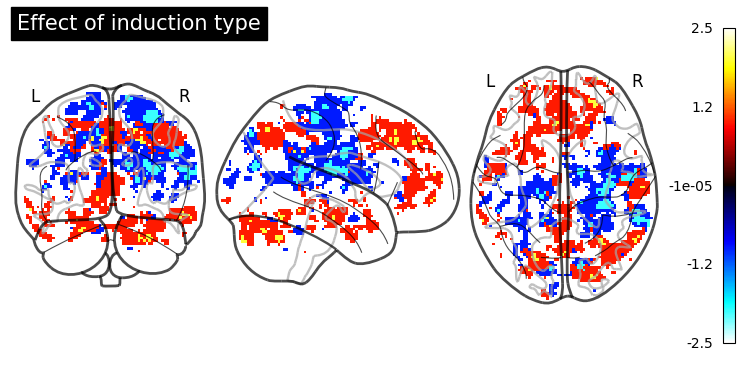

In [17]:
# plot glass brain
import nilearn.plotting as nip
nip.plot_glass_brain(cond_effect_img, plot_abs=False, colorbar=True, 
                     title='Effect of induction type', cmap='cold_hot', vmax=2.5, vmin=-2.5)  

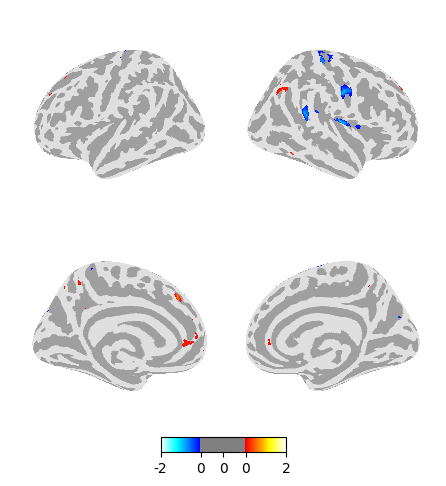

In [18]:
from nilearn import surface
from nilearn import plotting

plotting.plot_img_on_surf(cond_effect_img,
                          surf_mesh='fsaverage', # high-res: 'fsaverage', low-res: 'fsaverage5#
                          views=['lateral', 'medial'],
                          hemispheres=['left', 'right'],
                          threshold = 0.9,
                          inflate=True,
                          darkness=0.5,
                          cmap='cold_hot', vmax=2.5, vmin=-2.5,
                          colorbar=True)
plotting.show()

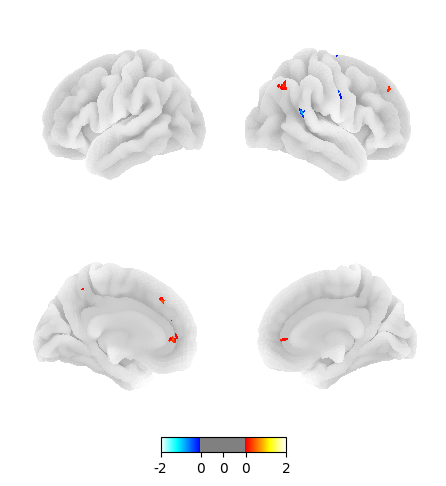

In [53]:
from nilearn import surface
from nilearn import plotting

plotting.plot_img_on_surf(cond_effect_img,
                          surf_mesh='fsaverage5', # high-res: 'fsaverage', low-res: 'fsaverage5#
                          views=['lateral', 'medial'],
                          hemispheres=['left', 'right'],
                          threshold = 0.9,
                          inflate=False,
                          darkness=0.5,
                          cmap='cold_hot', vmax=2.5, vmin=-2.5,
                          colorbar=True)
plotting.show()

In [19]:
from nilearn.datasets import fetch_atlas_difumo
difumo_data = fetch_atlas_difumo(dimension=512, resolution_mm=2, data_dir=None, resume=True, verbose=1, legacy_format=False)
# load 4d image and fetch the first volume
difumo_4d = nib.load(difumo_data['maps'])

In [20]:
from nibabel.affines import apply_affine
import numpy.linalg as npl

def get_difumo_label(word_coord):
    voxel_coord = apply_affine(npl.inv(difumo_4d.affine), word_coord).astype(int)
    max = np.max(difumo_4d.get_fdata()[voxel_coord[0], voxel_coord[1], voxel_coord[2], :])
    argmax = np.argmax(difumo_4d.get_fdata()[voxel_coord[0], voxel_coord[1], voxel_coord[2], :])
    location = difumo_data['labels'].iloc[argmax, :] 
    return location['difumo_names'], location['yeo_networks17'], max

In [21]:
actual_stat_image = cond_pos_vox_tstat_fdrp_c1_img
clust_table = get_clusters_table(stat_img=actual_stat_image,
                   stat_threshold=-np.log10(0.05),
                   cluster_threshold=0,
                   #min_distance=20
                   ) 

clust_table['region'] = 'N/A'
clust_table['yeo_network'] = 'N/A'


for i, row in clust_table.iterrows():
    x, y, z = row['X'], row['Y'], row['Z']
    region, yeo_nw, prob = get_difumo_label([x,y,z])
    clust_table.loc[row.name, 'region'] = region
    clust_table.loc[row.name, 'yeo_network'] = yeo_nw

clust_table

,Cluster ID,X,Y,Z,Peak Stat,Cluster Size (mm3),region,yeo_network
0,1,-6.0,30.0,42.0,5.112550,40,Paracingulate sulcus LH,SalVentAttnB
1,2,30.0,-60.0,-36.0,4.775339,80,Cerebellum VI RH,No network found
2,3,18.0,30.0,48.0,4.775339,24,Superior frontal gyrus middle RH,DefaultA
3,4,0.0,-70.0,48.0,3.730758,16,Precuneus mid-posterior,ContC
4,5,22.0,-88.0,-38.0,3.578879,40,Cerebellum Crus II posterior,No network found
5,6,24.0,46.0,40.0,2.695484,80,Superior frontal gyrus middle RH,DefaultA
6,7,2.0,-68.0,48.0,2.695484,16,Precuneus mid-posterior,ContC
7,8,-62.0,-44.0,-14.0,2.421810,8,Middle temporal gyrus postero-inferior LH,ContA
8,9,54.0,-58.0,-20.0,2.421810,8,Cerebellum Crus I superior,VisCent
9,10,56.0,-60.0,-18.0,2.087942,24,Inferior occipital gyrus,VisCent


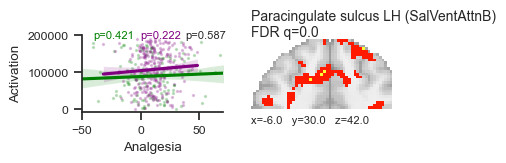

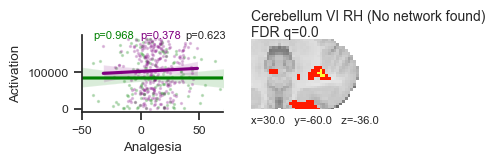

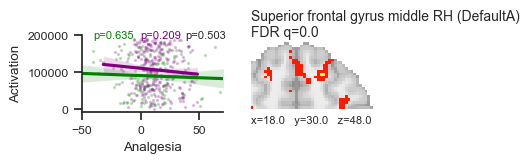

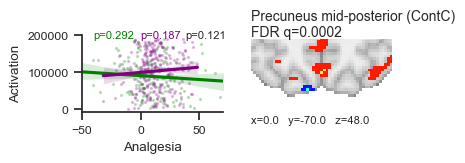

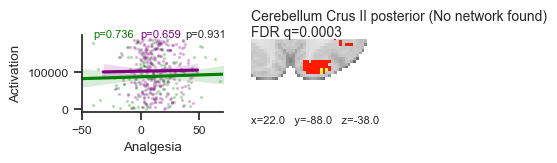

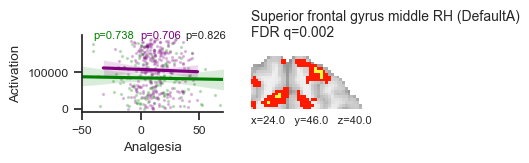

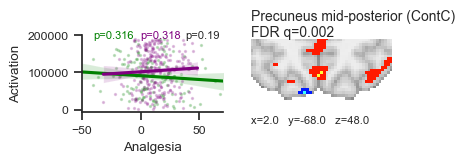

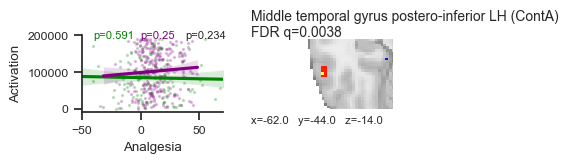

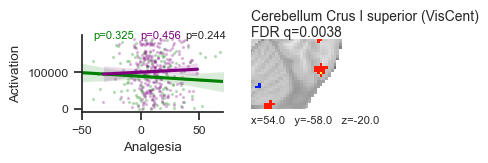

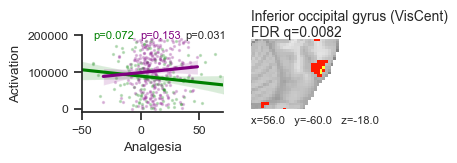

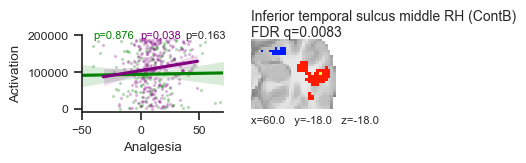

In [23]:
from nilearn.plotting import plot_stat_map
import matplotlib.pyplot as plt 
import statsmodels.formula.api as smf

data_4d_ranked_img_data = data_4d_ranked_img.get_fdata()
pheno['Analgesia'] = pheno['Rating_diff']*-1

plt.rc_context({"axes.spines.left": False, "axes.spines.bottom": False})

sns.set(font_scale=0.8)
sns.set_style("ticks")

zoom_span = 50
xs = []
ys = []
zs = []

for i, row in clust_table[clust_table['Peak Stat']>2].iterrows():
    x, y, z = row['X'], row['Y'], row['Z']

    voxel_coord = apply_affine(npl.inv(data_4d_ranked_img.affine), [x,y,z]).astype(int)
    pheno['Activation'] = data_4d_ranked_img_data[voxel_coord[0],voxel_coord[1],voxel_coord[2],:]
    # stats
    res = smf.ols(formula='Activation ~  Analgesia + Age + Male', data=pheno[pheno['Conditioning']=='suggestions']).fit()
    int_pval = res.pvalues['Analgesia']
    res = smf.ols(formula='Activation ~  Analgesia + Age + Male', data=pheno[pheno['Conditioning']=='suggestions & conditioning']).fit()
    condint_pval = res.pvalues['Analgesia']
    mod = smf.ols(formula='Activation ~  Analgesia * Conditioning + Age + Male', data=pheno)
    res = mod.fit()
    interaction_pval = res.pvalues['Analgesia:Conditioning[T.suggestions & conditioning]']

    fig = plt.figure(figsize=(4, 1)) # layout="constrained"
    axes = fig.subplots(1, 2)
    voxel_coord = apply_affine(npl.inv(data_4d_ranked_img.affine), [x,y,z]).astype(int)
    sns.regplot(data=pheno[pheno['Conditioning']=='suggestions'], x='Analgesia', y='Activation', ax=axes[0], scatter_kws={'s':2, 'alpha':0.2}, color='green')
    sns.regplot(data=pheno[pheno['Conditioning']=='suggestions & conditioning'], x='Analgesia', y='Activation', ax=axes[0], scatter_kws={'s':2, 'alpha':0.2}, color='purple')
    #axes[0].yaxis.set_label_position("right")
    axes[0].set_xlim(-50, 70)
    axes[0].text(-40, 200000, 'p=' + str(np.round(int_pval, 3)), fontsize=8, color='green', verticalalignment='center')
    axes[0].text(0, 200000, 'p=' + str(np.round(condint_pval, 3)), fontsize=8, color='purple', verticalalignment='center')
    axes[0].text(38, 200000, 'p=' + str(np.round(interaction_pval, 3)), fontsize=8, verticalalignment='center')
    sns.despine(left=False, right=True)
    #axes[0].yaxis.tick_right()

    disp = plot_stat_map(cond_effect_img, display_mode='z', cut_coords=[z],
                    annotate=False, cmap='cold_hot', vmax=2.5, vmin=-2.5, colorbar=False, figure=fig, axes=axes[1]) 
    disp.axes[z].ax.set_xlim(x-zoom_span, x+zoom_span)
    disp.axes[z].ax.set_ylim(y-zoom_span/2, y+zoom_span/2)
    text = row['region'] + ' (' + row['yeo_network'] + ')\n' + 'FDR q=' + str(np.round(10**-row['Peak Stat'], 4))
    #text += 'FDR cluster size: ' + str(row['Cluster Size (mm3)']) + 'mm³' + '\n'  	
    disp.axes[z].ax.text(x-zoom_span, y+zoom_span/2+10, text, fontsize=10, verticalalignment='center')
    text = 'x=' + str(row['X']) + '   y=' + str(row['Y']) + '   z=' + str(row['Z']) 
    disp.axes[z].ax.text(x-zoom_span, y-zoom_span/2-8, text, fontsize=8, verticalalignment='center')
    plt.savefig('../fig/cluster_pos_' + str(i) + '.pdf', bbox_inches="tight")
    plt.show()


Now fetch data from a bigger environment: 5mm-diamter sphere

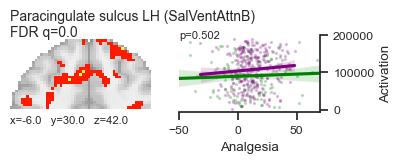

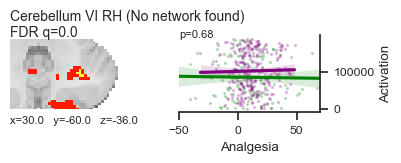

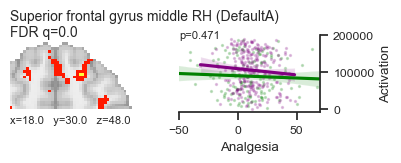

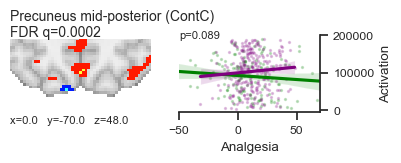

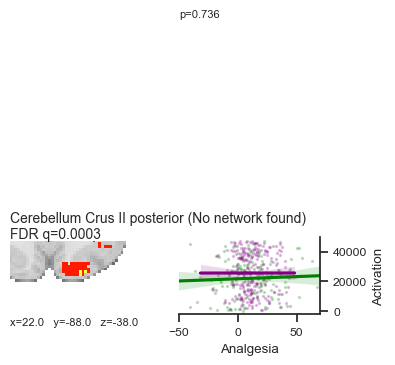

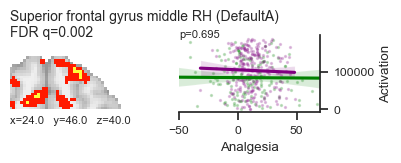

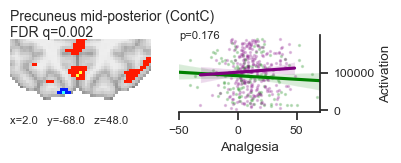

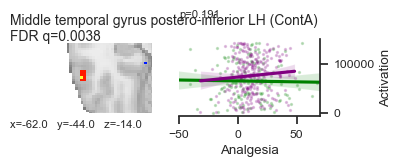

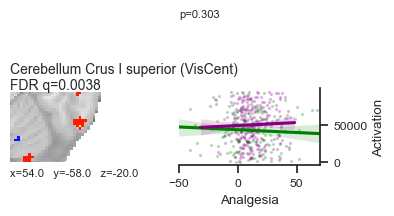

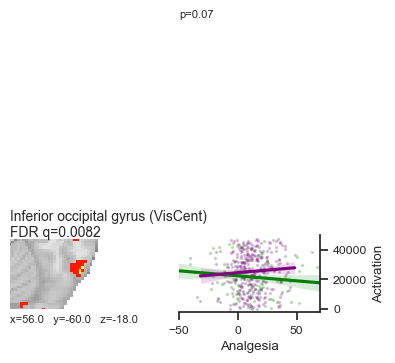

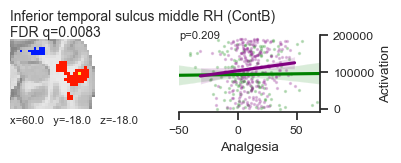

In [24]:
from nilearn.plotting import plot_stat_map
import matplotlib.pyplot as plt 
import statsmodels.formula.api as smf

data_4d_ranked_img_data = data_4d_ranked_img.get_fdata()
pheno['Analgesia'] = pheno['Rating_diff']*-1

plt.rc_context({"axes.spines.left": False, "axes.spines.bottom": False})

sns.set(font_scale=0.8)
sns.set_style("ticks")

zoom_span = 50
xs = []
ys = []
zs = []

for i, row in clust_table[clust_table['Peak Stat']>2].iterrows():
    x, y, z = row['X'], row['Y'], row['Z']

    # hand-crafted "sphere"
    voxel_coord = apply_affine(npl.inv(data_4d_ranked_img.affine), [x,y,z]).astype(int)
    data=data_4d_ranked_img_data[voxel_coord[0]-1:voxel_coord[0]+1,
                        voxel_coord[1]-1:voxel_coord[1]+1,
                        voxel_coord[2]-1:voxel_coord[2]+1,:]
    pheno['Activation'] = np.mean(data, axis=(0,1,2))
    # stats
    mod = smf.ols(formula='Activation ~  Analgesia * Conditioning + Age + Male', data=pheno)
    res = mod.fit()
    interaction_pval = res.pvalues['Analgesia:Conditioning[T.suggestions & conditioning]']

    fig = plt.figure(figsize=(4, 1)) # layout="constrained"
    axes = fig.subplots(1, 2)
    
    sns.regplot(data=pheno[pheno['Conditioning']=='suggestions'], x='Analgesia', y='Activation', ax=axes[1], scatter_kws={'s':2, 'alpha':0.2}, color='green')
    sns.regplot(data=pheno[pheno['Conditioning']=='suggestions & conditioning'], x='Analgesia', y='Activation', ax=axes[1], scatter_kws={'s':2, 'alpha':0.2}, color='purple')
    axes[1].yaxis.set_label_position("right")
    axes[1].set_xlim(-50, 70)
    axes[1].text(-50, 200000, 'p=' + str(np.round(interaction_pval, 3)), fontsize=8, verticalalignment='center')
    sns.despine(left=True, right=False)
    axes[1].yaxis.tick_right()

    disp = plot_stat_map(cond_effect_img, display_mode='z', cut_coords=[z],
                    annotate=False, cmap='cold_hot', vmax=2.5, vmin=-2.5, colorbar=False, figure=fig, axes=axes[0]) 
    disp.axes[z].ax.set_xlim(x-zoom_span, x+zoom_span)
    disp.axes[z].ax.set_ylim(y-zoom_span/2, y+zoom_span/2)
    text = row['region'] + ' (' + row['yeo_network'] + ')\n' + 'FDR q=' + str(np.round(10**-row['Peak Stat'], 4))
    #text += 'FDR cluster size: ' + str(row['Cluster Size (mm3)']) + 'mm³' + '\n'  	
    disp.axes[z].ax.text(x-zoom_span, y+zoom_span/2+10, text, fontsize=10, verticalalignment='center')
    text = 'x=' + str(row['X']) + '   y=' + str(row['Y']) + '   z=' + str(row['Z']) 
    disp.axes[z].ax.text(x-zoom_span, y-zoom_span/2-8, text, fontsize=8, verticalalignment='center')
    plt.savefig('../fig/cluster_pos_' + str(i) + '.pdf', bbox_inches="tight")
    plt.show()


In [25]:
actual_stat_image = cond_neg_vox_tstat_fdrp_c2_img
clust_table = get_clusters_table(stat_img=actual_stat_image,
                   stat_threshold=-np.log10(0.05),
                   cluster_threshold=0
                   ) 

clust_table['region'] = 'N/A'
clust_table['yeo_network'] = 'N/A'


for i, row in clust_table.iterrows():
    x, y, z = row['X'], row['Y'], row['Z']
    region, yeo_nw, prob = get_difumo_label([x,y,z])
    clust_table.loc[row.name, 'region'] = region
    clust_table.loc[row.name, 'yeo_network'] = yeo_nw

clust_table

,Cluster ID,X,Y,Z,Peak Stat,Cluster Size (mm3),region,yeo_network
0,1,30.0,-34.0,56.0,6.907667,464,Superior parts of central and postcentral sulc...,SomMotA
1,2,54.0,-10.0,32.0,6.652570,232,Central sulcus inferior,SomMotB
2,2a,46.0,-10.0,28.0,5.974221,,Central sulcus inferior,SomMotB
3,3,32.0,-18.0,16.0,6.600509,448,Insula postero-inferior medial,SomMotB
4,3a,36.0,-10.0,20.0,2.093468,,Central operculum posterior RH,SomMotB
5,4,14.0,-8.0,74.0,6.600509,112,Superior frontal gyrus superior,SomMotA
6,5,66.0,-44.0,14.0,6.594345,232,Superior temporal gyrus posterior RH,TempPar
7,5a,56.0,-44.0,18.0,6.459461,,Superior temporal gyrus posterior RH,TempPar
8,5b,60.0,-44.0,10.0,4.864837,,Middle temporal gyrus mid-posterior RH,TempPar
9,6,-10.0,-82.0,46.0,6.031079,48,Parieto-occipital sulcus postero-superior,VisPeri


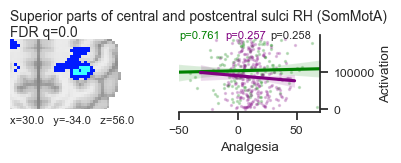

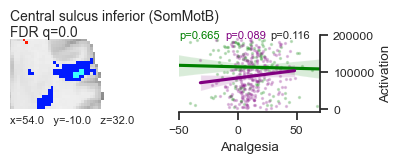

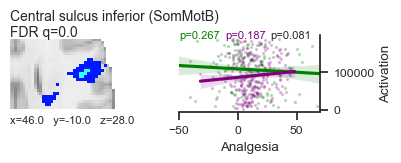

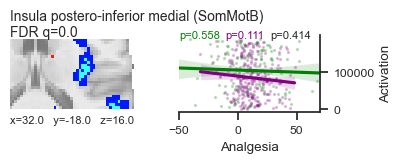

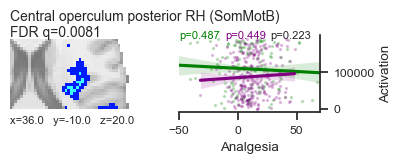

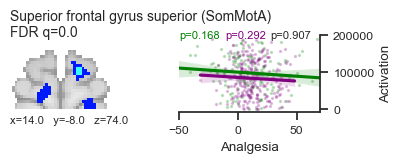

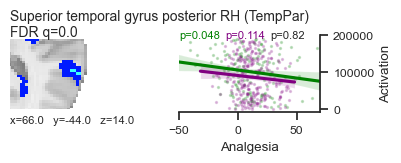

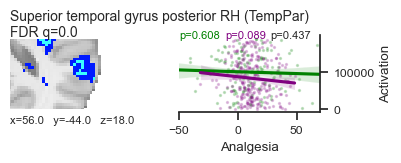

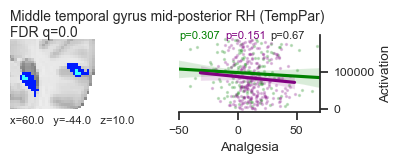

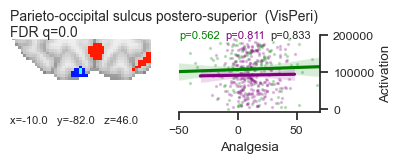

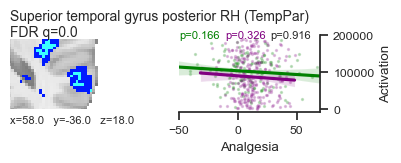

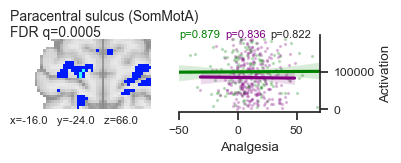

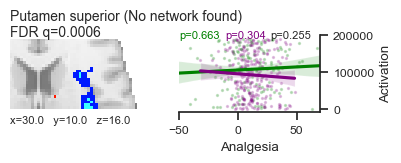

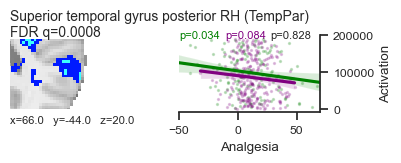

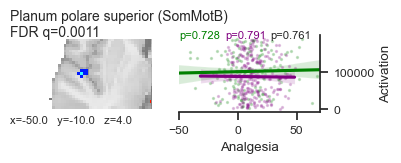

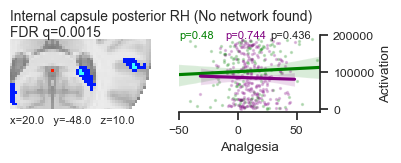

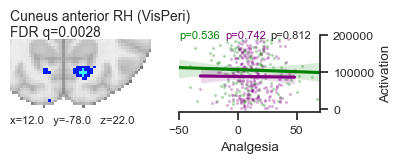

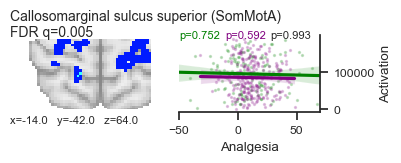

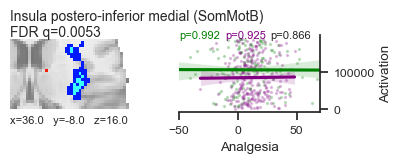

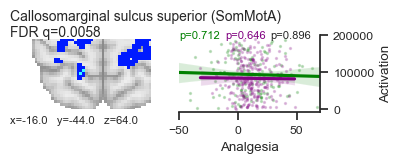

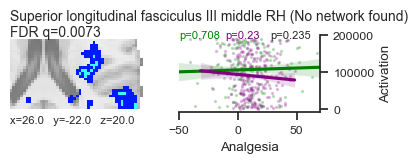

In [26]:
from nilearn.plotting import plot_stat_map
import matplotlib.pyplot as plt 
import statsmodels.formula.api as smf

data_4d_ranked_img_data = data_4d_ranked_img.get_fdata()
pheno['Analgesia'] = pheno['Rating_diff']*-1

plt.rc_context({"axes.spines.left": False, "axes.spines.bottom": False})

sns.set(font_scale=0.8)
sns.set_style("ticks")

zoom_span = 50
xs = []
ys = []
zs = []

for i, row in clust_table[clust_table['Peak Stat']>2].iterrows():
    x, y, z = row['X'], row['Y'], row['Z']

    voxel_coord = apply_affine(npl.inv(data_4d_ranked_img.affine), [x,y,z]).astype(int)
    pheno['Activation'] = data_4d_ranked_img_data[voxel_coord[0],voxel_coord[1],voxel_coord[2],:]
    # stats
    res = smf.ols(formula='Activation ~  Analgesia + Age + Male', data=pheno[pheno['Conditioning']=='suggestions']).fit()
    int_pval = res.pvalues['Analgesia']
    res = smf.ols(formula='Activation ~  Analgesia + Age + Male', data=pheno[pheno['Conditioning']=='suggestions & conditioning']).fit()
    condint_pval = res.pvalues['Analgesia']
    mod = smf.ols(formula='Activation ~  Analgesia * Conditioning + Age + Male', data=pheno)
    res = mod.fit()
    interaction_pval = res.pvalues['Analgesia:Conditioning[T.suggestions & conditioning]']

    fig = plt.figure(figsize=(4, 1)) # layout="constrained"
    axes = fig.subplots(1, 2)
    
    sns.regplot(data=pheno[pheno['Conditioning']=='suggestions'], x='Analgesia', y='Activation', ax=axes[1], scatter_kws={'s':2, 'alpha':0.2}, color='green')
    sns.regplot(data=pheno[pheno['Conditioning']=='suggestions & conditioning'], x='Analgesia', y='Activation', ax=axes[1], scatter_kws={'s':2, 'alpha':0.2}, color='purple')
    axes[1].yaxis.set_label_position("right")
    axes[1].set_xlim(-50, 70)
    axes[1].text(-50, 200000, 'p=' + str(np.round(int_pval, 3)), fontsize=8, color='green', verticalalignment='center')
    axes[1].text(-11, 200000, 'p=' + str(np.round(condint_pval, 3)), fontsize=8, color='purple', verticalalignment='center')
    axes[1].text(28, 200000, 'p=' + str(np.round(interaction_pval, 3)), fontsize=8, verticalalignment='center')
    sns.despine(left=True, right=False)
    axes[1].yaxis.tick_right()

    disp = plot_stat_map(cond_effect_img, display_mode='z', cut_coords=[z],
                    annotate=False, cmap='cold_hot', vmax=2.5, vmin=-2.5, colorbar=False, figure=fig, axes=axes[0]) 
    disp.axes[z].ax.set_xlim(x-zoom_span, x+zoom_span)
    disp.axes[z].ax.set_ylim(y-zoom_span/2, y+zoom_span/2)
    text = row['region'] + ' (' + row['yeo_network'] + ')\n' + 'FDR q=' + str(np.round(10**-row['Peak Stat'], 4))
    #text += 'FDR cluster size: ' + str(row['Cluster Size (mm3)']) + 'mm³' + '\n'  	
    disp.axes[z].ax.text(x-zoom_span, y+zoom_span/2+10, text, fontsize=10, verticalalignment='center')
    text = 'x=' + str(row['X']) + '   y=' + str(row['Y']) + '   z=' + str(row['Z']) 
    disp.axes[z].ax.text(x-zoom_span, y-zoom_span/2-8, text, fontsize=8, verticalalignment='center')
    plt.savefig('../fig/cluster_neg_' + str(i) + '.pdf', bbox_inches="tight")
    plt.show()
